Silly little script to plot gradient and segmented reference curves

#89=IfcGradientCurve((#90),.F.,#65,#106)
#112=IfcSegmentedReferenceCurve((#113),.F.,#89,#130)


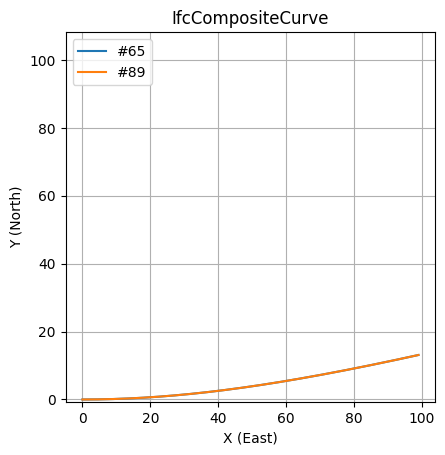

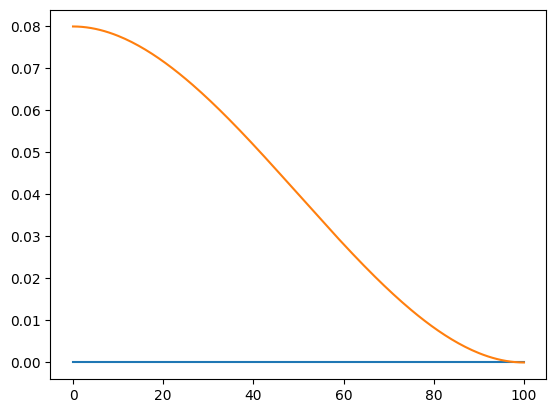

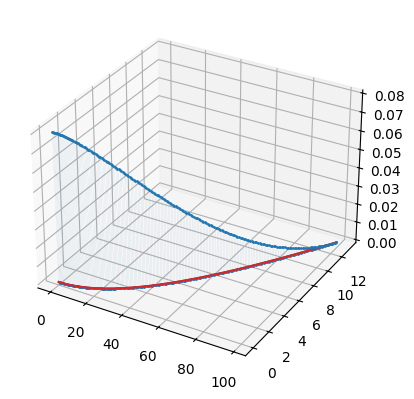

In [8]:
import ifcopenshell
import ifcopenshell.geom as geom
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))



#model = ifcopenshell.open("F:/IfcAlignmentDriver/TestFiles/Viadotto_Acerno_ADD2_rn7jkRY.ifc")
#model = ifcopenshell.open("F:/IfcOpenShell/_build-vs2022-x64/examples/FHWA_Bridge_Geometry_Alignment_Example.ifc")
#model = ifcopenshell.open("F:/IfcOpenshell/_installed-vs2022-x64/bin/sectioned-solid-horizontal_bloss_cant.ifc")
model = ifcopenshell.open("F:/IFC-Rail-Unit-Test-Reference-Code/alignment_testset/IFC-WithGeneratedGeometry/GENERATED__CantAlignment_BlossCurve_100.0_300_1000_1_Meter.ifc")

curves = model.by_type("IfcGradientCurve",False) + model.by_type("IfcSegmentedReferenceCurve",False)

settings = geom.settings()

fig1 = plt.figure().add_subplot()
fig2 = plt.figure().add_subplot()
fig3 = plt.figure().add_subplot(projection="3d")

for curve in curves:
    print(curve)
    shape = geom.create_shape(settings,curve)
    verts = shape.verts
    verts = np.array(verts).reshape((-1,3))
    x,y,z = verts.T
    
    fig1.plot(x,y,label="#" + str(curve.BaseCurve.id()))

    # want to plot (dist along, elevation) so need to compute
    # dist along from x,y. the following is probably bad code,
    # I just used Microsoft Copilot to generate it
    # Convert to Numpy arrays
    points = np.array(list(zip(x, y)))
    # Calculate pairwise distances using the Euclidean distance formula
    distances = []
    distances.append(0.0)
    for i in range(len(points)-1):
        dist = euclidean_distance(points[i], points[i+1])
        distances.append(dist + distances[i])
    
    fig2.plot(distances,z,label="#" + str(curve.BaseCurve.id()))
    
    markerline, stemline, baseline = fig3.stem(x,y,z,label="#"+str(curve.id()))
    plt.setp(stemline,linewidth=0.05)
    plt.setp(stemline,linestyles="dashed")
    plt.setp(markerline,markersize=1)
    
fig1.set_title("IfcCompositeCurve")
fig1.legend(loc="upper left")
fig1.axis("square")
fig1.set_xlabel("X (East)")
fig1.set_ylabel("Y (North)")
fig1.grid(True)
plt.show()

fig2.set_title("IfcGradientCurve")
fig2.legend(loc="upper left")
fig2.set_xlabel("S (Dist)")
fig2.set_ylabel("Z (Elev)")
fig2.grid(True)
plt.show()

fig3.set_title("IfcGradientCurve")
fig3.legend()
fig3.axis("square")
fig3.set_xlabel("X (East)")
fig3.set_ylabel("Y (North)")
fig3.set_zlabel("Z (Elevation)")
fig3.grid(True)
plt.show()
